## SVM project 1.0
#### SVM algo, with talib indicators, hyper-params, pipeline

In [8]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Technical indicator library
import talib as ta

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import mplfinance as mpf  #  # print(mpf.__version__)   #    0.12.7a17

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import psycopg2
import shutil
import glob

## Training on only! (decisevly) UP days : Results: not good.

In [276]:
cols = ['DateTime','volume','BidAsk','open','high','low','close']
path = r"C:\Repo\U_55"                                 #    path =   "C:\Repo\R_65"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    rNQrame = pd.read_csv(filename, names = cols, index_col= 0, header=0, parse_dates=True)
    li.append(rNQrame)
    
frame_U = pd.concat(li, axis= 0, ignore_index= False)
frame_U.shape   #  (36460, 6)
frame_U['Up'] = 1
frame_U['Down'] = 0
# frame_U['Range'] = 0
# frame_U['RangeUp'] = 0
# frame_U['RangeDown'] = 0
frame_U.head()
    

,volume,BidAsk,open,high,low,close,Up,Down
DateTime,,,,,,,,
2022-12-12 00:00:00,103,10,3965.00,3965.50,3965.00,3965.00,1,0
2022-12-12 00:02:00,145,-5,3965.00,3965.50,3965.00,3965.50,1,0
2022-12-12 00:04:00,105,2,3965.25,3966.00,3965.25,3965.25,1,0
2022-12-12 00:06:00,122,-36,3965.25,3965.75,3964.50,3964.75,1,0
2022-12-12 00:08:00,174,11,3964.75,3965.50,3964.50,3965.00,1,0


In [20]:
frame_U.sample(10)
frame_U.shape   #(36460, 8)

,volume,BidAsk,open,high,low,close,Up,Down
DateTime,,,,,,,,
2023-01-20 07:38:00,433,62,11429.25,11432.75,11427.00,11431.25,1,0
2022-10-25 23:28:00,163,6,3837.50,3838.25,3837.50,3837.50,1,0
2022-09-28 17:06:00,0,0,NaN,NaN,NaN,NaN,1,0
2023-01-11 18:16:00,305,37,3989.00,3989.75,3988.50,3989.50,1,0
2023-03-24 16:12:00,1562,-188,4003.75,4004.25,4003.50,4004.00,1,0
2022-10-28 14:26:00,1655,-481,11544.00,11545.25,11537.00,11542.00,1,0
2023-02-13 02:42:00,235,10,12316.25,12317.25,12312.50,12315.50,1,0
2023-03-03 08:14:00,944,-208,3995.25,3995.25,3994.25,3994.75,1,0
2023-01-13 06:22:00,687,-75,3999.25,3999.25,3997.50,3998.25,1,0


In [74]:
# nqUp = frame_U[frame_U['close'] > 6000]
# esUp = frame_U[frame_U['close'] < 6000]
nqUp.shape  # (17014, 8)
esUp.shape   #(17741, 8)
# esUp.to_csv('esUp_1.csv', index=True)
nqUp.to_csv('nqUp_1.csv', index=True)

In [67]:
esUp.sample(3)

,volume,BidAsk,open,high,low,close,Up,Down
DateTime,,,,,,,,
2023-01-31 10:46:00,4423,184,4055.25,4056.25,4054.25,4055.75,1,0
2022-12-12 20:40:00,157,-1,4021.25,4021.75,4021.00,4021.75,1,0
2022-10-04 06:06:00,937,166,3746.50,3749.00,3746.50,3748.00,1,0


In [75]:
nqUp.sample(3)

,volume,BidAsk,open,high,low,close,Up,Down
DateTime,,,,,,,,
2022-11-29 13:22:00,1663,-99,11499.75,11502.00,11494.0,11501.00,1,0
2022-10-21 12:38:00,3853,-741,11226.75,11232.25,11184.5,11193.25,1,0
2023-03-29 09:30:00,10492,317,12887.75,12898.00,12881.0,12894.50,1,0


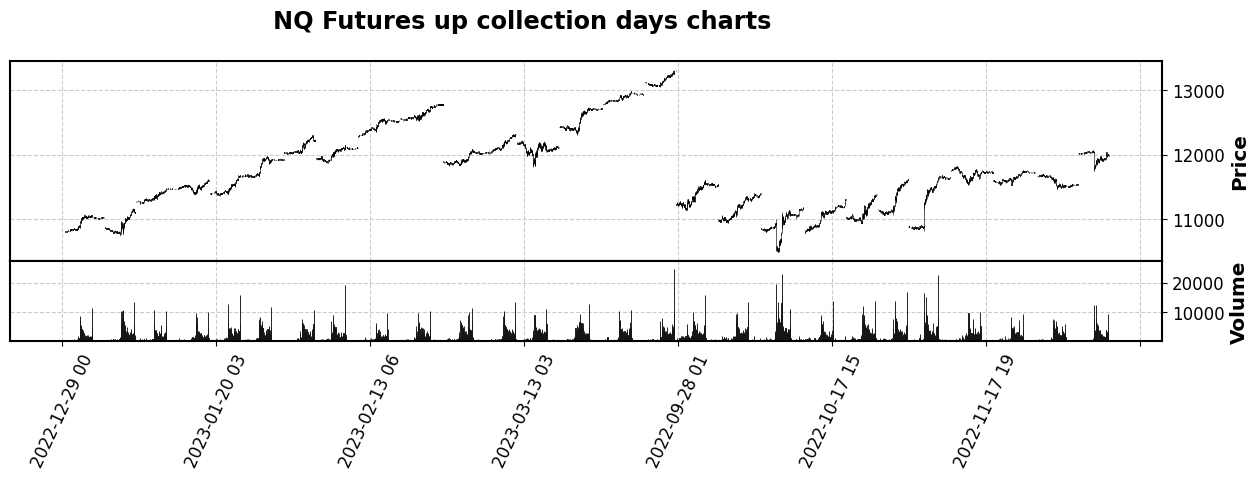

In [105]:
# Plot the financial market chart
# mpf.plot(nqUp, type='candle', style='classic', title='NQ Futures up collection days charts', figsize=(16,4), xrotation=65, datetime_format='%Y-%m-%d %H', volume=True, mav=(200), tight_layout=True, savefig='nqUp_1.png')
mpf.plot(nqUp, type='candle', style='classic', title='NQ Futures up collection days charts', figsize=(16,4), xrotation=65, datetime_format='%Y-%m-%d %H', volume=True) # mav=(100),

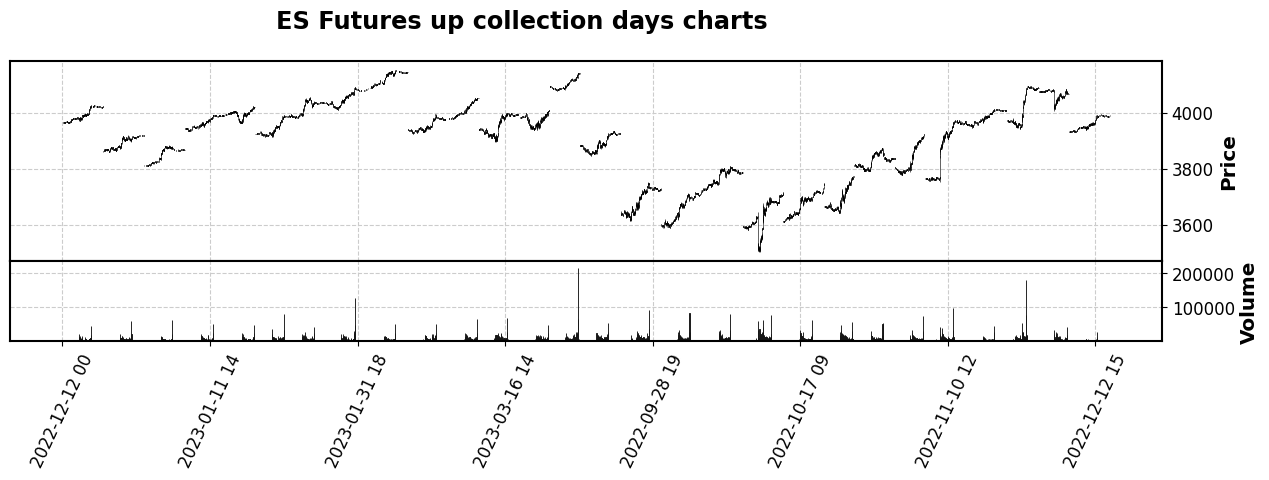

In [104]:
mpf.plot(esUp, type='candle', style='classic', title='ES Futures up collection days charts', figsize=(16,4), xrotation=65, datetime_format='%Y-%m-%d %H', volume=True)#  savefig='esUp_1.png'

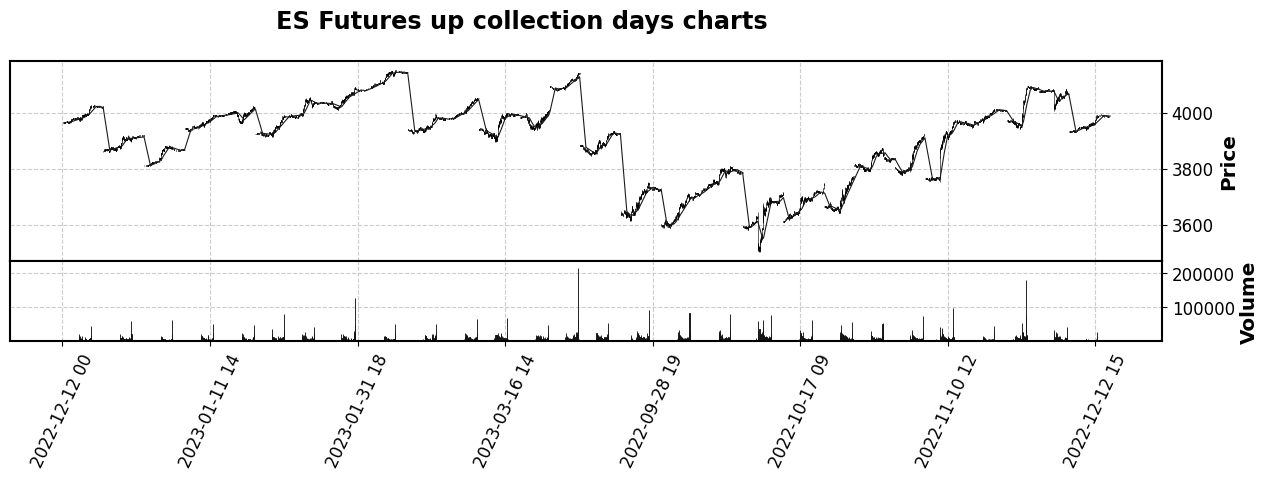

In [103]:
# Plot the financial market chart
mpf.plot(esUp, type='candle', style='classic', title='ES Futures up collection days charts', figsize=(16,4), xrotation=65, datetime_format='%Y-%m-%d %H', volume=True, mav=(100), tight_layout=False)#  savefig='esUp_1.png'

### Make on esUp ...

In [116]:
# # Drop the rows with zero volume traded
# esUp1 = esUp.copy()
# esUp1.shape    #(17741, 8)
# # esUp = esUp.drop(esUp[esUp['volume'] == 0].index)
# esUp1 = esUp1.drop(esUp1[esUp1['volume'] == 0].index)
# esUp1.shape #   (17741, 8)
esUp1.head()

,volume,BidAsk,open,high,low,close,Up,Down
DateTime,,,,,,,,
2022-12-12 00:00:00,103,10,3965.00,3965.50,3965.00,3965.00,1,0
2022-12-12 00:02:00,145,-5,3965.00,3965.50,3965.00,3965.50,1,0
2022-12-12 00:04:00,105,2,3965.25,3966.00,3965.25,3965.25,1,0
2022-12-12 00:06:00,122,-36,3965.25,3965.75,3964.50,3964.75,1,0
2022-12-12 00:08:00,174,11,3964.75,3965.50,3964.50,3965.00,1,0


In [ ]:
# Convert the 'Time' column into pandas datetime format
esUp1['DateTime'] = pd.to_datetime(esUp1['DateTime'])  # already converted 

# Set the Time column as index
# esUp1.set_index('Time', inplace=True)

## Create indicators

Decide the time period for which to calculate the indicators. Chose a variable `n` with a value of 20 (minutes).

All the indicators for the same time period. 

In [118]:
# Create a variable n with a value of 10
n = 10   #  Since our candles are 2 min each, the lookout period will be 20 minutes (10 * 2 = 20)

In [126]:
# Create a column by name, RSI and assign the calculation of RSI to it
# esUp1['RSI'] = ta.RSI(np.array(esUp1['close'].shift(1)), timeperiod = n)
esUp1.head(50)

,volume,BidAsk,open,high,low,close,Up,Down,RSI
DateTime,,,,,,,,,
2022-12-12 00:00:00,103,10,3965.00,3965.50,3965.00,3965.00,1,0,NaN
2022-12-12 00:02:00,145,-5,3965.00,3965.50,3965.00,3965.50,1,0,NaN
2022-12-12 00:04:00,105,2,3965.25,3966.00,3965.25,3965.25,1,0,NaN
2022-12-12 00:06:00,122,-36,3965.25,3965.75,3964.50,3964.75,1,0,NaN
2022-12-12 00:08:00,174,11,3964.75,3965.50,3964.50,3965.00,1,0,NaN
2022-12-12 00:10:00,169,-44,3965.25,3965.25,3963.50,3963.75,1,0,NaN
2022-12-12 00:12:00,162,-12,3963.50,3964.00,3963.25,3963.50,1,0,NaN
2022-12-12 00:14:00,97,-1,3963.50,3963.50,3962.75,3963.25,1,0,NaN
2022-12-12 00:16:00,81,-13,3963.25,3963.50,3963.00,3963.25,1,0,NaN


### Calculate SMA and correlation coefficient

Simple Moving Average is calculated using the `rolling` method of pandas with a window of `n` minutes.

The correlation coefficient is calculated between the `close` prices and Simple Moving Average with a window of `n` minutes.

In [128]:
# Create a column by name, SMA and assign the SMA calculation to it
esUp1['SMA'] = esUp1['close'].shift(1).rolling(window=n).mean()

# Create a column by name, Corr and assign the calculation of correlation to it
esUp1['Corr'] = esUp1['close'].shift(1).rolling(window = n).corr(esUp1['SMA'].shift(1))
esUp1.sample(5)

,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr
DateTime,,,,,,,,,,,
2023-01-11 06:50:00,318,-46,3950.50,3950.75,3949.25,3949.25,1,0,56.997947,3950.250,0.716134
2023-01-31 12:34:00,2805,73,4059.75,4061.00,4059.75,4060.25,1,0,56.826320,4059.450,0.391762
2022-10-21 16:18:00,823,201,3767.00,3768.00,3767.00,3767.75,1,0,61.641189,3765.575,-0.140654
2022-10-13 10:06:00,20575,-1784,3552.25,3556.75,3542.50,3543.50,1,0,72.735475,3537.300,0.745897
2023-03-02 19:12:00,414,42,3979.75,3980.25,3979.75,3980.25,1,0,55.137982,3979.025,-0.571706


### Calculate SAR and ADX

SAR and ADX are calculated on `High` and `Low` prices because they are intended to be sensitive to new Highs and Lows created. In the SAR indicator, the values of `0.2` represent the acceleration and maximum step parameters. 

Generally, we use `close` prices while calculating ADX. However, in this case, we will use the `Open` price to incorporate the more recent price information. We can also change this to the `close` price of the previous candle.

In [132]:
# Create a column by name, SAR and assign the SAR calculation to it
esUp1['SAR'] = ta.SAR(np.array(esUp1['high'].shift(1)), np.array(esUp1['low'].shift(1)), 0.2, 0.2)

# Create a column by name, ADX and assign the ADX calculation to it
esUp1['ADX'] = ta.ADX(np.array(esUp1['high'].shift(1)), np.array(esUp1['low'].shift(1)), np.array(esUp1['open']), timeperiod = n)
esUp1.sample(5)

,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX
DateTime,,,,,,,,,,,,,
2023-02-13 07:44:00,661,-45,4112.00,4112.00,4111.25,4111.50,1,0,57.304785,4113.375,-0.721771,4114.000000,52.487825
2023-01-31 05:24:00,511,-19,4018.75,4019.00,4017.50,4018.25,1,0,45.045164,4018.700,-0.266078,4018.350000,23.485398
2022-12-12 00:26:00,15,-7,3931.50,3931.75,3931.50,3931.50,1,0,3.611170,3931.900,0.569660,3942.945299,82.744850
2023-01-13 05:20:00,567,121,4004.75,4005.75,4004.25,4004.25,1,0,62.826387,4003.800,0.856186,4003.740000,15.674961
2022-09-19 10:30:00,19726,-427,3889.00,3891.75,3884.00,3885.00,1,0,65.624074,3883.825,0.209376,3878.700000,35.735207


### Previous minute's OHLC
We pass the previous minute's `High`, `Low`, and `close` prices as input to the algorithm. This will help the algorithm sense the volatility of the past time period.

In [133]:
# Create columns high, low and close with previous minute's OHLC data
esUp1['Prev_High'] = esUp1['high'].shift(1)
esUp1['Prev_Low'] = esUp1['low'].shift(1)
esUp1['Prev_close'] = esUp1['close'].shift(1)

print(esUp1.shape) #(17741, 16)
esUp1.tail(5)

(17741, 16)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close
DateTime,,,,,,,,,,,,,,,,
2022-12-12 23:50:00,67,28,3988.25,3988.50,3988.00,3988.50,1,0,70.707431,3987.000,0.728268,3986.960,33.513247,3988.25,3987.75,3988.25
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.00,1,0,72.631644,3987.300,0.823686,3987.000,36.463040,3988.50,3988.00,3988.50
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.00,1,0,76.117874,3987.525,0.886711,3987.300,39.886789,3989.25,3988.50,3989.00
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.00,1,0,76.117874,3987.675,0.961269,3987.690,42.968163,3989.25,3988.75,3989.00
2022-12-12 23:58:00,102,-13,3989.00,3989.75,3989.00,3989.75,1,0,76.117874,3987.900,0.950099,3988.002,45.741399,3989.00,3988.75,3989.00


Create two more columns as features: the change in `Open` prices between last (2) minute(s) and current (2) minute & the difference between current (etc)minute's `Open` and last minute's `Close` prices.

In [134]:
# Create columns 'OO' with the difference between the current minute's open and last minute's open
esUp1['OO'] = esUp1['open'] - esUp1['open'].shift(1)

# Create columns 'OC' with the difference between the current minute's open and last minute's close
esUp1['OC'] = esUp1['open'] - esUp1['Prev_Close']
print(esUp1.shape)
esUp1.tail(5)

(17741, 18)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC
DateTime,,,,,,,,,,,,,,,,,,
2022-12-12 23:50:00,67,28,3988.25,3988.50,3988.00,3988.50,1,0,70.707431,3987.000,0.728268,3986.960,33.513247,3988.25,3987.75,3988.25,0.25,0.00
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.00,1,0,72.631644,3987.300,0.823686,3987.000,36.463040,3988.50,3988.00,3988.50,0.50,0.25
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.00,1,0,76.117874,3987.525,0.886711,3987.300,39.886789,3989.25,3988.50,3989.00,0.25,0.00
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.00,1,0,76.117874,3987.675,0.961269,3987.690,42.968163,3989.25,3988.75,3989.00,0.00,0.00
2022-12-12 23:58:00,102,-13,3989.00,3989.75,3989.00,3989.75,1,0,76.117874,3987.900,0.950099,3988.002,45.741399,3989.00,3988.75,3989.00,0.00,0.00


# Important !!! bellow

## Calculate returns
Next, we calculate the returns for every data point. We also save returns of past n minutes in n columns named as return1, return2 and so on. This will help the algorithm to understand the trend of the returns in the last n periods.  

In [136]:
# Create a column 'Fut_Ret' with the calculation of returns
esUp1['Fut_Ret'] = (esUp1['open'].shift(-1) - esUp1['open']) / esUp1['open']

# Create n columns and assign
for i in range(1, n):
    esUp1['return%i' % i] = esUp1['Fut_Ret'].shift(i)
    
print(esUp1.shape)   # (17741, 28)
esUp1.tail(5)

(17741, 28)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC,Fut_Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-12 23:50:00,67,28,3988.25,3988.50,3988.00,3988.50,1,0,70.707431,3987.000,0.728268,3986.960,33.513247,3988.25,3987.75,3988.25,0.25,0.00,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188,0.000188,0.000251
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.00,1,0,72.631644,3987.300,0.823686,3987.000,36.463040,3988.50,3988.00,3988.50,0.50,0.25,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188,0.000188
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.00,1,0,76.117874,3987.525,0.886711,3987.300,39.886789,3989.25,3988.50,3989.00,0.25,0.00,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.00,1,0,76.117874,3987.675,0.961269,3987.690,42.968163,3989.25,3988.75,3989.00,0.00,0.00,0.000000,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063
2022-12-12 23:58:00,102,-13,3989.00,3989.75,3989.00,3989.75,1,0,76.117874,3987.900,0.950099,3988.002,45.741399,3989.00,3988.75,3989.00,0.00,0.00,NaN,0.000000,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125


### Trim the data

We need to keep the values of indicator `Corr` between -1 and 1, as the correlation coefficient is always between these values. This is done by changing all values less than -1 to -1, and all values greater than 1 to 1.

This doesn't affect our calculations negatively because the extreme values are realised due to NaN values in the data, which need to be handled before training the algorithm. Then we drop all NaNs from the entire dataframe.

In [137]:
# Change the value of 'Corr' to -1 if it is less than -1
esUp1.loc[esUp1['Corr'] < -1, 'Corr'] = -1

# Change the value of 'Corr' to 1 if it is greater than 1
esUp1.loc[esUp1['Corr'] > 1, 'Corr'] = 1

# Drop the NaN values
print(esUp1.shape)   # (17741, 28)
esUp1 = esUp1.dropna()
print(esUp1.shape)   # (17720, 28)   21 records with NaN dropped
esUp1.tail(3)

(17741, 28)
(17720, 28)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC,Fut_Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.0,1,0,72.631644,3987.300,0.823686,3987.00,36.463040,3988.50,3988.00,3988.5,0.50,0.25,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188,0.000188
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.0,1,0,76.117874,3987.525,0.886711,3987.30,39.886789,3989.25,3988.50,3989.0,0.25,0.00,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.0,1,0,76.117874,3987.675,0.961269,3987.69,42.968163,3989.25,3988.75,3989.0,0.00,0.00,0.000000,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063


## Train and test data

We will be using 80% of the data to train and the rest 20% to test. You will create a split parameter that will divide the dataframe in an 80-20 ratio.

This can be changed as per our choice, but it is advisable to give at least 70% data as train data for good results. 

In [139]:
# Create a variable split that stores 80% of the length of the dataframe
t = .8
split = int(t * len(esUp1))
split   # 14176
esUp1.shape   # (17720, 28)  
#17720 - 14176   = 3534 # what percantage of the data is 3534?  3534/17720 = 0.1992 or 20% of the data is 3534 records

(17720, 28)

# Important!!! below

## Create output signals

Next, we assign signal values corresponding to returns that were calculated earlier. To do this, we split the data into three equal parts.

1. Highest returns’ quantile is assigned `Signal` 1 or Buy.
2. Middle quantile is assigned `Signal` 0 or do nothing.
3. Lowest quantile is assigned `Signal` -1 or Sell. 

We assign a value of 1 to `Signal` column where the current returns are greater than the highest quantile returns of train data. Similarly, we will assign a value of -1 to `Signal` column where the current returns are lesser than the lowest quantile returns of the train data. 

In [140]:
# Create a column by name, 'Signal' and initialise with 0
esUp1['Signal'] = 0

# Assign a value of 1 to 'Signal' column 
esUp1.loc[esUp1['Fut_Ret'] > esUp1['Fut_Ret'][:split].quantile(q= 0.66), 'Signal'] = 1

# Assign a value of -1 to 'Signal' column 
esUp1.loc[esUp1['Fut_Ret'] < esUp1['Fut_Ret'][:split].quantile(q= 0.34), 'Signal'] = -1

In [143]:
esUp1.shape  # (17720, 29)
esUp1.sample(5)

,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC,Fut_Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-13 23:06:00,237,-79,3703.75,3704.00,3702.00,3702.00,1,0,56.556282,3702.275,-0.831994,3702.036,30.354456,3704.00,3702.50,3703.75,0.50,0.00,-0.000540,0.000135,-0.000135,0.000270,0.000203,0.000000,0.000473,-0.000270,-0.000135,-0.000068,-1
2023-03-31 02:44:00,494,66,4084.50,4085.00,4084.25,4084.25,1,0,46.213681,4084.275,-0.490413,4084.100,13.169974,4084.75,4084.25,4084.25,-0.25,0.25,-0.000061,-0.000061,-0.000122,0.000245,-0.000122,0.000184,0.000184,0.000061,-0.000306,-0.000245,0
2022-10-13 03:48:00,386,-81,3594.25,3595.50,3593.75,3594.50,1,0,56.954263,3593.875,-0.197416,3593.200,21.266571,3596.75,3593.75,3594.75,-1.25,-0.50,0.000070,-0.000348,-0.000417,0.000765,0.000487,-0.000139,0.000418,-0.000209,0.000139,-0.001251,0
2022-10-03 11:04:00,8682,-761,3669.50,3669.75,3666.25,3669.00,1,0,53.448141,3671.425,-0.762021,3673.350,38.024873,3669.75,3666.50,3669.25,2.25,0.25,-0.000136,0.000614,-0.000409,-0.000953,-0.000340,0.000272,0.000340,-0.000816,-0.000136,0.000817,-1
2023-01-11 07:56:00,650,100,3946.75,3948.25,3946.50,3948.25,1,0,43.820495,3948.450,0.041115,3950.750,22.275058,3949.50,3946.25,3947.00,-2.00,-0.25,0.000380,-0.000506,-0.000063,-0.000190,0.000063,0.000570,-0.000190,-0.000127,0.000127,-0.000127,1


This model will be an intraday strategy that requires squaring off all the positions at the end of the day. To do this, at the closing time, we will assign the `Signal` and `Fut_Ret` columns as 0.

Since we are working with the data from an US Futures, where the closing time is 16:00 hours, we will assign `Signal` and `Fut_Ret` as 0 for times at 16 hours.

For data from other exchanges, this needs to be changed according to the exchange's close time. If our data has entries after closing time, then the `Signal` and `Fut_Ret` values for such rows need to be changed to '0' as well. 

In [147]:
# Assign a value of 0 to 'Signal' column at 1529 time
esUp1.loc[(esUp1.index.hour == 16) & (esUp1.index.minute == 00), 'Signal'] = 0

# Assign a value of 0 to 'Fut_Ret' column at 1529 time
esUp1.loc[(esUp1.index.hour == 16) & (esUp1.index.minute == 00), 'Fut_Ret'] = 0
esUp1.sample(5)

,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC,Fut_Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-29 04:48:00,188,-33,3821.25,3822.00,3821.25,3821.50,1,0,62.827573,3820.650,0.730796,3820.50,39.639881,3821.75,3821.25,3821.25,-0.50,0.00,0.000065,-0.000131,0.000196,0.000000,-0.000065,0.000000,0.000131,0.000327,0.000262,-0.000196,0
2022-11-22 10:46:00,4605,217,3981.25,3984.00,3979.50,3983.00,1,0,59.511246,3980.475,-0.273240,3977.00,28.669016,3982.50,3979.75,3981.25,0.00,0.00,0.000502,0.000000,0.000565,0.000251,-0.000503,-0.000126,-0.000063,-0.000126,-0.000377,0.000565,1
2022-12-21 15:34:00,5640,-36,3902.50,3904.50,3902.00,3903.00,1,0,45.788542,3903.000,-0.131187,3905.00,24.220898,3903.25,3901.25,3902.75,0.25,-0.25,0.000128,0.000064,0.000513,-0.001152,0.000192,0.000064,0.000384,-0.000192,-0.000128,0.000128,1
2023-01-20 02:20:00,562,190,3927.25,3929.00,3927.00,3928.75,1,0,69.980247,3925.450,0.912343,3925.50,26.815250,3927.50,3926.75,3927.25,0.25,0.00,0.000382,0.000064,-0.000064,0.000382,0.000127,0.000064,0.000064,0.000064,0.000127,0.000000,1
2023-01-23 15:52:00,8978,53,4036.25,4037.25,4035.00,4035.25,1,0,66.536479,4029.425,-0.034842,4027.88,21.993670,4036.75,4032.00,4036.00,4.00,0.25,-0.000248,0.000992,-0.000186,0.000807,0.000310,0.000621,-0.000807,0.000497,0.000062,0.000248,-1


### Creating the features and values
Drop the columns `Close`, `Signal`, `Time`, `High`, `Low`, `Volume`, and `Fut_Ret` `Up`	`Down` since the algorithm will not be trained on these features. Next, we assign `Signal` to `y` which is the output variable that you will predict using test data.  

In [155]:
# Use drop method to drop the columns
X = esUp1.drop(['BidAsk','close', 'Signal', 'high','low', 'volume', 'Fut_Ret', 'Up', 'Down'], axis = 1)

# Create a variable which contains all the 'Signal' values
y = esUp1['Signal']

In [156]:
print(type(y))
print(type(X))
X.dtypes

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


open          float64
RSI           float64
SMA           float64
Corr          float64
SAR           float64
ADX           float64
Prev_High     float64
Prev_Low      float64
Prev_Close    float64
OO            float64
OC            float64
return1       float64
return2       float64
return3       float64
return4       float64
return5       float64
return6       float64
return7       float64
return8       float64
return9       float64
dtype: object

In [158]:
X.sample()

,open,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC,return1,return2,return3,return4,return5,return6,return7,return8,return9
DateTime,,,,,,,,,,,,,,,,,,,,
2022-12-12 18:22:00,4021.0,57.145646,4021.425,-0.34091,4020.25,37.471285,4022.5,4021.0,4021.25,0.0,-0.25,0.0,-0.000062,0.000124,-0.000124,-0.000124,-0.000186,0.000186,0.000124,-0.000062


In [171]:
y.sample()

DateTime
2023-01-11 07:16:00   -1
Name: Signal, dtype: int64

## Find the best parameters

### Pipeline and functions

As the first step to finding the best hyperparameters among C, Gamma and Kernel, we will first create a pipeline of functions required to run in a specific order on the training data. 

The `steps` contains references to functions applied to the data when called through a pipeline function. In this case, we will scale the data first and then fit it to the SVC function. This is done to avoid the effect of the individual weights of the features.

In [172]:
# Create the 'steps' variable with the pipeline functions
steps = [('scaler', StandardScaler()), ('svc', SVC())]

# Pass the 'steps' to the Pipeline function
pipeline = Pipeline(steps)

### Hyperparameters

The hyperparameters are iterated over to arrive at the best possible combination for the given training data. These test values can be changed as per our choice. Here, we will choose 4 test values for `c` and 3 test values for `g`.  

In [173]:
# Test variables for 'c' and 'g'
c = [10, 100, 1000, 10000]
g = [1e-2, 1e-1, 1e0]

The `rbf` is used as a singular entry in the kernel parameters. But one can go ahead and try other kernel functions, such as linear, poly and sigmoid.

<b>To remember:</b> A higher number of parameters would result in a greater time for the code to run. 

In [174]:
# Intialise the parameters
parameters = {'svc__C': c, 'svc__gamma': g, 'svc__kernel': ['rbf'] }

Next, you need to create a `RandomizedSearchCV` function with a `TimeSeriesSplit` object with a `n_split` value of `2`. This value can be anything more than or equal to 2. The `TimeSeriesSplit` is used to sequentially split a time series. Then `RandomizedSearchCV` arrives at the scores of different random combinations of the hyperparameters.

These scores would be used to find the best parameters and create a newly optimized support vector classifier. Alternatively, one can use a GridSearch here. 

In [175]:
# Call the RandomizedSearchCV function and pass the parameters
rcv = RandomizedSearchCV(pipeline, parameters, cv=TimeSeriesSplit(n_splits = 2))

### Training on and fetching the best parameters
             
Next, we need to fit the train data to `rcv` created above to obtain the best hyperparameters. The best parameters can be obtained using the `best_params_` method.

In [176]:
# Call the 'fit' method of rcv and pass the train data to it
rcv.fit(X.iloc[:split], y.iloc[:split])

# Call the 'best_params_' method to obtain the best parameters of C
best_C = rcv.best_params_['svc__C']

# Call the 'best_params_' method to obtain the best parameters of kernel
best_kernel = rcv.best_params_['svc__kernel']

# Call the 'best_params_' method to obtain the best parameters of gamma
best_gamma = rcv.best_params_['svc__gamma']

- For 17,700 rows, it took aprox 18 minutes finding the best svc_gamma- so its about 1 min / 1000 rows. 

## Create the Support Vector Machine

### Create the new SVC

In this line of code, we instantiate a new support vector classifier function with the best hyperparameters.

In [177]:
# Create a new SVC classifier
cls = SVC(C = best_C, kernel = best_kernel, gamma = best_gamma)

### Train the data

As done previously, for finding the best hyperparameters, we will first scale the data before we fit it to the classifier to train on. To do this, we need to instantiate the `StandardScaler` function.

In [179]:
# Instantiate the StandardScaler
ss1 = StandardScaler()

We will use the scaled training data to train the classifier algorithm.

In [180]:
# Pass the scaled train data to the SVC classifier
cls.fit(ss1.fit_transform(X.iloc[:split]), y.iloc[:split])   # Result: SVC(C = 100, gamma = 0.1)

SVC(C=100, gamma=0.1)

## Voila! ...  our prediction model is ready!

## Predict the signals

Now, we can use the test data to make predictions and save the output in a list called `y_predict`. This list will have the predicted values of signals for the test data.  

In [181]:
# Pass the test data to the predict function and store the values into 'y_predict'
y_predict = cls.predict(ss1.transform(X.iloc[split:]))

# Initiate a column by name, 'Pred_Signal' and assign 0 to it
esUp1['Pred_Signal'] = 0

### Save the predictions

1. To save predicted y values of test data, we can assign `y_predict` to `Pred_Signal` using the split.
2. To save predicted y values for train data, we make predictions for train data and save it similarly.

In [182]:
# Save the predicted values for the train data
esUp1.iloc[:split, esUp1.columns.get_loc('Pred_Signal')] = pd.Series( cls.predict(ss1.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
esUp1.iloc[split:, esUp1.columns.get_loc('Pred_Signal')] = y_predict

Since the algorithm was trained on the train data, its accuracy is expected to be better on this train data than the test data. You can print these two separately to check the accuracies. (TRY VARIOUS COMBINATIONS!)

## Use the model for trading strategy 

### Trading strategy 
        
Our trading strategy is to buy/sell/do nothing at that period for which the algorithm generates the signal. The strategy assumes that we always get a fill at the open prices. 

In [183]:
# Calculate strategy returns and store them in 'Ret1' column
esUp1['Ret1'] = esUp1['Fut_Ret'] * esUp1['Pred_Signal']

## Analyse the performance

Please note that here we are using only the test data to compare the performance of the strategy. We can pass the entire 'Ret1' column and check the performance on both the test and train data if we wish to.

The confusion matrix is a table layout that allows visualisation of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another). [Additional Reading on Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [184]:
# Calculate the confusion matrix
cm = confusion_matrix(y[split:], y_predict)
cm

array([[310, 565, 264],
       [204, 836, 178],
       [348, 513, 326]], dtype=int64)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported the necessary data and assigned it to the variable 'data'

# Create a seaborn plot
sns.lineplot(x='x', y='y', data= nqUp)

# Get the current axes object
ax = plt.gca()

# Set the tick label formatter to display numbers in fixed-point notation
ax.get_xaxis().set_major_formatter(plt.FixedFormatter())
ax.get_yaxis().set_major_formatter(plt.FixedFormatter())

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming you have already imported the necessary data and assigned it to the variable 'data'

# Create a seaborn plot
sns.lineplot(x='x', y='y', data=data)

# Get the current axes object
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming you have already imported the necessary data and assigned it to the variable 'data'

# Create a seaborn plot
sns.lineplot(x='x', y='y', data=data)

# Get the current axes object
ax = plt.gca()

# Set the tick label formatter to display numbers in fixed-point notation
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=True))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=True))

# Show the plot
plt.show()
# Show the plot
plt.show()

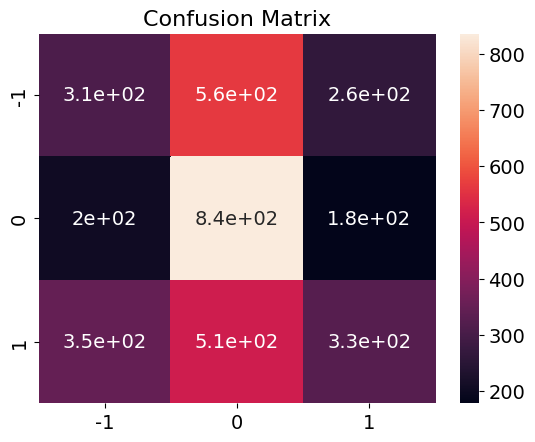

In [212]:

import matplotlib.ticker as ticker
np.set_printoptions(suppress=True)
# Set the font sizes
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams.update({'font.size': 14})

# Plot the confusion matrix
ax = plt.subplot()

sns.heatmap(cm, annot= True, ax= ax)
# Set the tick label formatter to display numbers in fixed-point notation
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=True))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=True))


# Set the axis labels
ax.xaxis.set_ticklabels(['-1', '0', '1'])
ax.yaxis.set_ticklabels(['-1', '0', '1'])
np.set_printoptions(suppress=True)

plt.show()

In [ ]:
# 310 560 260  # 310 + 560 + 260 = 1130     class    -1  Sell 310 correct out of 1130 instances or 27.43%
# 200 840 180 # 200 + 840 + 180 = 1220      class     0  Do Nothing 840 correct out of 1220 instances or 68.85%
# 350 510 330 # 350 + 510 + 330 = 1190      class     1  Buy 350 correct out of 1190 instances or 29.41%
# # 1130 + 1220 + 1190 = 3540

From the confusion matrix, we can see how the model correctly predicted:
* 310 560 260  # 310 + 560 + 260 = 1130     class    1  Buy 310 correct out of 1130 instances or 27.43%
* 200 840 180 # 200 + 840 + 180 = 1220      class    0  Do Nothing 840 correct out of 1220 instances or 68.85%
* 350 510 330 # 350 + 510 + 330 = 1190      class   -1  Sell 350 correct out of 1190 instances or 29.41%
* 1130 + 1220 + 1190 = 3540

## Classification Report
The classification report computes `precision`, `recall`, `F-measure` and `support` for each class.

The `precision` is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The `recall` is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The `F-beta score` can be interpreted as a weighted harmonic mean of the `precision` and `recall`, where an F-beta score reaches its best value at 1 and the worst score at 0.

The `support` is the number of occurrences of each class in the true prediction.

In [202]:
# Calculate the classification report
cr = classification_report(y[split:], y_predict)
print(cr)

              precision    recall  f1-score   support

          -1       0.36      0.27      0.31      1139
           0       0.44      0.69      0.53      1218
           1       0.42      0.27      0.33      1187

    accuracy                           0.42      3544
   macro avg       0.41      0.41      0.39      3544
weighted avg       0.41      0.42      0.39      3544



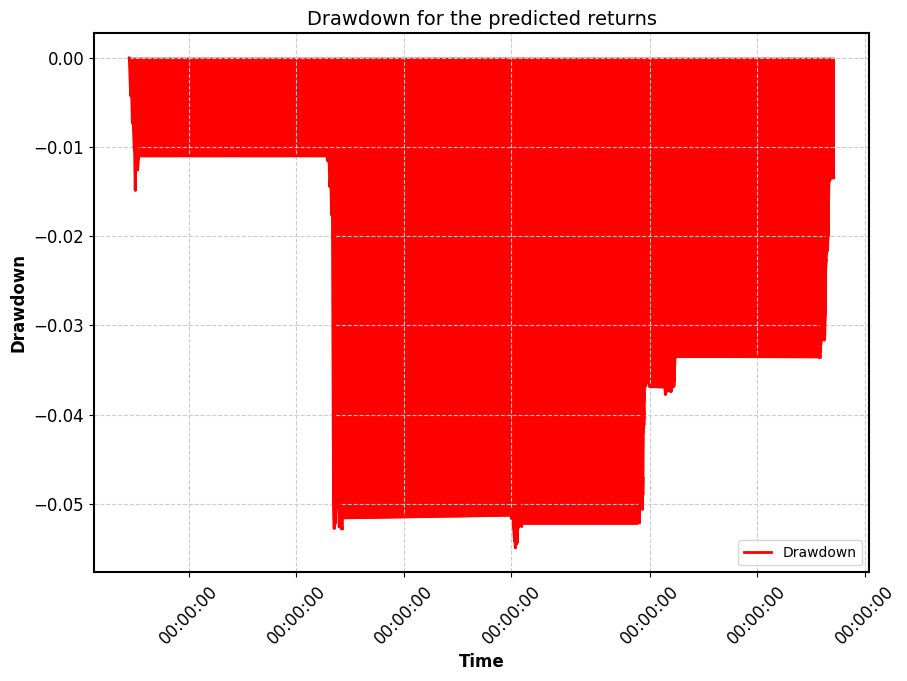

The maximum drawdown is -5.49%


In [203]:
"""
The drawdown metrics and plotting is performed here
"""
# Calculate the cumulative returns
cum_rets = (esUp1['Ret1'][split:]+1).cumprod()

# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1
drawdown.index = cum_rets.index

# Calculate the maximum drawdown
max_dd = drawdown.min()*100

# Plot the drawdown
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(drawdown, color='r')
ax.fill_between(drawdown.index, drawdown.values, color='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))

# Set the font sizes
_ = plt.xticks(rotation=45)
plt.title('Drawdown for the predicted returns', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Drawdown', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(labels=["Drawdown"], prop={'size': 10}, loc="lower right")

# Display the plot
plt.show()
print("The maximum drawdown is %.2f" % max_dd+"%")

In [253]:
# Calculate the annualised Sharpe ratio
sharpe = np.sqrt(252*6.25*60) * esUp1['Ret1'][split:].mean() / esUp1['Ret1'][split:].std()

print("The annualised Sharpe ratio is %.2f" % sharpe)

The annualised Sharpe ratio is -1.88


## Plot the results

Now we plot the results to visualise the performance.

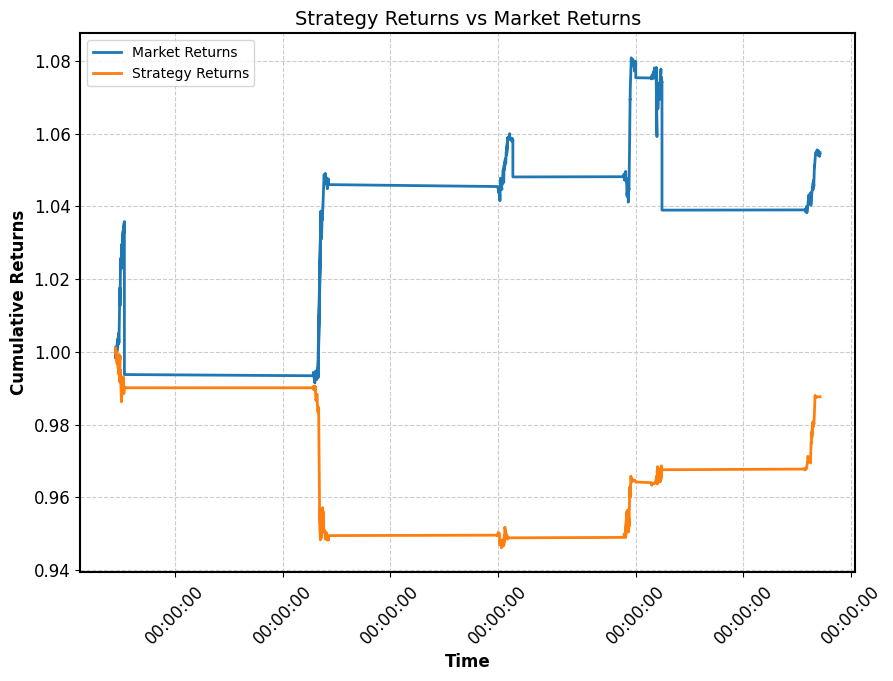

The strategy return is -1.24%


In [205]:
# Plotting the returns
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot((esUp1['Fut_Ret'][split:]+1).cumprod())
ax.plot((esUp1['Ret1'][split:]+1).cumprod())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))
_ = plt.xticks(rotation=45)

# Setting the labels and font sizes
plt.title('Strategy Returns vs Market Returns', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(labels=["Market Returns", "Strategy Returns"],
          prop={'size': 10}, loc="upper left")
plt.show()


return_strategy = ((esUp1['Ret1'][split:]+1).cumprod().tail(1)[0]-1)*100
print("The strategy return is %.2f" % return_strategy + "%")

# All in all, pretty bad results based on the training with RSI, ADX, SAR, Corr, Prev Period, 

## What can we Change? 

### Tweaking the code ideas:
 
One can tweak the code in the following ways:
1. Use different data sets: backtest and try out the model on different data sets!
2. Features: create your own features using different indicators that could improve the prediction accuracy
3. Try different CV splits
4. Try Grid Search for best hyperparameters selection. Try different kernels and check for results 
5. Change the trading strategy as you wish! <br><br>

# Part II --------training on older 2 day model

### Lets try to use the saved SVM model from 2 days training (vs the one on 20+) 

In [223]:
esUp.shape   #(17741, 8)
esUp.head()

,volume,BidAsk,open,high,low,close,Up,Down
DateTime,,,,,,,,
2022-12-12 00:00:00,103,10,3965.00,3965.50,3965.00,3965.00,1,0
2022-12-12 00:02:00,145,-5,3965.00,3965.50,3965.00,3965.50,1,0
2022-12-12 00:04:00,105,2,3965.25,3966.00,3965.25,3965.25,1,0
2022-12-12 00:06:00,122,-36,3965.25,3965.75,3964.50,3964.75,1,0
2022-12-12 00:08:00,174,11,3964.75,3965.50,3964.50,3965.00,1,0


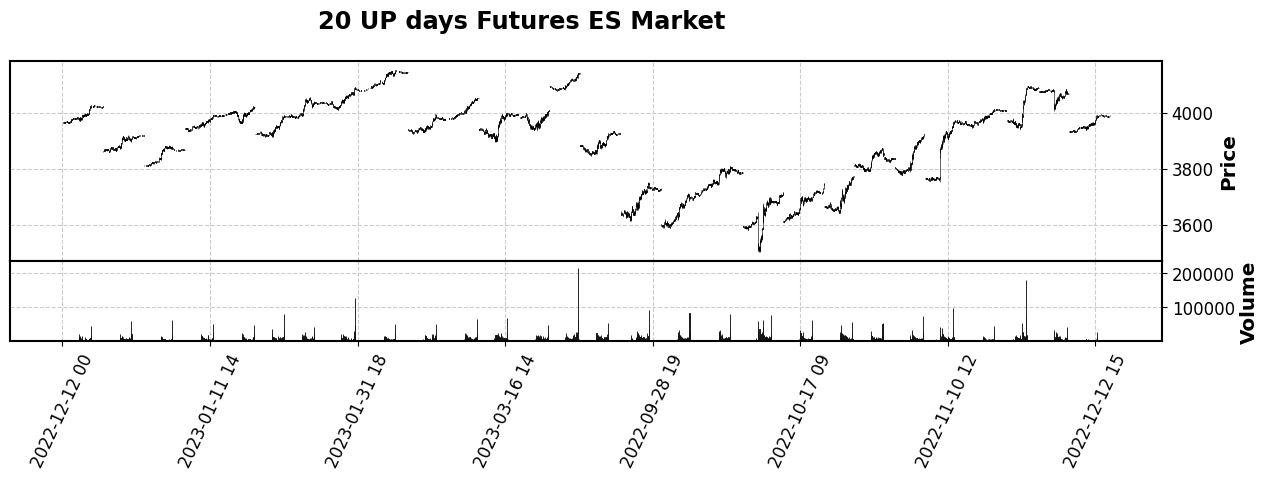

In [225]:
mpf.plot(esUp, type='candle', style='classic', title='20 UP days Futures ES Market', figsize=(16,4), xrotation=65, datetime_format='%Y-%m-%d %H', volume=True) # mav=(100),

In [226]:
# Create a variable n with a value of 10
n = 10

In [229]:
# Create a column by name, RSI and assign the calculation of RSI to it
esUp['RSI'] = ta.RSI(np.array(esUp['close'].shift(1)), timeperiod = n)
# Create a column by name, SMA and assign the SMA calculation to it
esUp['SMA'] = esUp['close'].shift(1).rolling(window=n).mean()
# Create a column by name, Corr and assign the calculation of correlation to it
esUp['Corr'] = esUp['close'].shift(1).rolling(window=n).corr(esUp['SMA'].shift(1))
# Create a column by name, SAR and assign the SAR calculation to it
esUp['SAR'] = ta.SAR(np.array(esUp['high'].shift(1)), np.array(esUp['low'].shift(1)), 0.2, 0.2)
# Create a column by name, ADX and assign the ADX calculation to it
esUp['ADX'] = ta.ADX(np.array(esUp['high'].shift(1)), np.array(esUp['low'].shift(1)), np.array(esUp['open']), timeperiod = n)
# Create columns high, low and close with previous minute's OHLC data
esUp['Prev_High'] = esUp['high'].shift(1)
esUp['Prev_Low'] = esUp['low'].shift(1)
esUp['Prev_Close'] = esUp['close'].shift(1)

print(esUp.shape)

(17741, 16)


In [231]:
# Create columns high, low and close with previous minute's OHLC data
esUp['Prev_High'] = esUp['high'].shift(1)
esUp['Prev_Low'] = esUp['low'].shift(1)
esUp['Prev_Close'] = esUp['close'].shift(1)

print(esUp.shape) #(17741, 16)
# esUp.tail(5)

(17741, 16)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close
DateTime,,,,,,,,,,,,,,,,
2022-12-12 23:50:00,67,28,3988.25,3988.50,3988.00,3988.50,1,0,70.707431,3987.000,0.728268,3986.960,33.513247,3988.25,3987.75,3988.25
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.00,1,0,72.631644,3987.300,0.823686,3987.000,36.463040,3988.50,3988.00,3988.50
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.00,1,0,76.117874,3987.525,0.886711,3987.300,39.886789,3989.25,3988.50,3989.00
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.00,1,0,76.117874,3987.675,0.961269,3987.690,42.968163,3989.25,3988.75,3989.00
2022-12-12 23:58:00,102,-13,3989.00,3989.75,3989.00,3989.75,1,0,76.117874,3987.900,0.950099,3988.002,45.741399,3989.00,3988.75,3989.00


In [232]:
# Create columns 'OO' with the difference between the current minute's open and last minute's open
esUp['OO'] = esUp['open']-esUp['open'].shift(1)

# Create columns 'OC' with the difference between the current minute's open and last minute's close
esUp['OC'] = esUp['open']-esUp['Prev_Close']
print(esUp.shape)
esUp.tail(5)

(17741, 18)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC
DateTime,,,,,,,,,,,,,,,,,,
2022-12-12 23:50:00,67,28,3988.25,3988.50,3988.00,3988.50,1,0,70.707431,3987.000,0.728268,3986.960,33.513247,3988.25,3987.75,3988.25,0.25,0.00
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.00,1,0,72.631644,3987.300,0.823686,3987.000,36.463040,3988.50,3988.00,3988.50,0.50,0.25
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.00,1,0,76.117874,3987.525,0.886711,3987.300,39.886789,3989.25,3988.50,3989.00,0.25,0.00
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.00,1,0,76.117874,3987.675,0.961269,3987.690,42.968163,3989.25,3988.75,3989.00,0.00,0.00
2022-12-12 23:58:00,102,-13,3989.00,3989.75,3989.00,3989.75,1,0,76.117874,3987.900,0.950099,3988.002,45.741399,3989.00,3988.75,3989.00,0.00,0.00


In [233]:
# Create a column 'Fut_Ret' with the calculation of returns
esUp['Fut_Ret'] = (esUp['open'].shift(-1) - esUp['open']) / esUp['open']

# Create n columns and assign
for i in range(1, n):
    esUp['return%i' % i] = esUp['Fut_Ret'].shift(i)
    
print(esUp.shape)
esUp.tail(5)

(17741, 28)


,volume,BidAsk,open,high,low,close,Up,Down,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC,Fut_Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-12 23:50:00,67,28,3988.25,3988.50,3988.00,3988.50,1,0,70.707431,3987.000,0.728268,3986.960,33.513247,3988.25,3987.75,3988.25,0.25,0.00,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188,0.000188,0.000251
2022-12-12 23:52:00,58,17,3988.75,3989.25,3988.50,3989.00,1,0,72.631644,3987.300,0.823686,3987.000,36.463040,3988.50,3988.00,3988.50,0.50,0.25,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188,0.000188
2022-12-12 23:54:00,37,14,3989.00,3989.25,3988.75,3989.00,1,0,76.117874,3987.525,0.886711,3987.300,39.886789,3989.25,3988.50,3989.00,0.25,0.00,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063,-0.000188
2022-12-12 23:56:00,19,10,3989.00,3989.00,3988.75,3989.00,1,0,76.117874,3987.675,0.961269,3987.690,42.968163,3989.25,3988.75,3989.00,0.00,0.00,0.000000,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125,-0.000063
2022-12-12 23:58:00,102,-13,3989.00,3989.75,3989.00,3989.75,1,0,76.117874,3987.900,0.950099,3988.002,45.741399,3989.00,3988.75,3989.00,0.00,0.00,NaN,0.000000,0.000000,0.000063,0.000125,0.000063,0.000251,0.000000,0.000000,0.000125


In [234]:
esUp.head(5)
esUp.shape

(17741, 28)

In [235]:
# Change the value of 'Corr' to -1 if it is less than -1
esUp.loc[esUp['Corr'] < -1, 'Corr'] = -1

# Change the value of 'Corr' to 1 if it is greater than 1
esUp.loc[esUp['Corr'] > 1, 'Corr'] = 1

# Drop the NaN values
esUp = esUp.dropna()
esUp.shape

(17720, 28)

In [236]:
# Create a variable split that stores 80% of the length of the dataframe
t = .8
split = int(t * len(esUp))
split

14176

In [237]:
# Create a column by name, 'Signal' and initialise with 0
esUp['Signal'] = 0

# Assign a value of 1 to 'Signal' column 
esUp.loc[esUp['Fut_Ret'] > esUp['Fut_Ret'][:split].quantile(q= 0.66), 'Signal'] = 1

# Assign a value of -1 to 'Signal' column 
esUp.loc[esUp['Fut_Ret'] < esUp['Fut_Ret'][:split].quantile(q= 0.34), 'Signal'] = -1

In [238]:
# Assign a value of 0 to 'Signal' column at 1529 time
esUp.loc[(esUp.index.hour == 15) & (esUp.index.minute == 29), 'Signal'] = 0

# Assign a value of 0 to 'Fut_Ret' column at 1529 time
esUp.loc[(esUp.index.hour == 15) & (esUp.index.minute == 29), 'Fut_Ret'] = 0

In [240]:
# Use drop method to drop the columns
X = esUp.drop(['BidAsk', 'close', 'Signal', 'high', 'low', 'volume', 'Fut_Ret', 'Up', 'Down'], axis = 1)

# Create a variable which contains all the 'Signal' values
y = esUp['Signal']

 TENTATIVE !!! (maybe)TBD!  skip the previoues pipeline (training and fetching the best params) and use the best results into the Model from the 2 day Indian Market stock) : TENTATIVE !!!

In [214]:
import pickle
# Load the saved model from the file
with open('data\cls.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [255]:
# Create the 'steps' variable with the pipeline functions
steps1 = [('scaler', StandardScaler()), ('svc', SVC())]

# Pass the 'steps' to the Pipeline function
pipeline1 = Pipeline(steps1)

In [256]:
# Test variables for 'c' and 'g'
c1 = [10, 100, 1000, 10000]
g1 = [1e-2, 1e-1, 1e0]
# Intialise the parameters
parameters1 = {'svc__C': c1,
              'svc__gamma': g1,
              'svc__kernel': ['rbf']
              }

In [257]:
# Call the RandomizedSearchCV function and pass the parameters
rcv1 = RandomizedSearchCV(pipeline1, parameters1, cv = TimeSeriesSplit(n_splits= 2))

In [258]:
# Call the 'fit' method of rcv and pass the train data to it
rcv1.fit(X.iloc[:split], y.iloc[:split])

# Call the 'best_params_' method to obtain the best parameters of C
best_C = rcv1.best_params_['svc__C']

# Call the 'best_params_' method to obtain the best parameters of kernel
best_kernel = rcv1.best_params_['svc__kernel']

# Call the 'best_params_' method to obtain the best parameters of gamma
best_gamma = rcv1.best_params_['svc__gamma']

In [259]:
# Create a new SVC classifier
cls1 = SVC(C = best_C, kernel = best_kernel, gamma = best_gamma)

In [260]:
# Instantiate the StandardScaler
ss2 = StandardScaler()

In [261]:
# Pass the scaled train data to the SVC classifier
cls1.fit(ss2.fit_transform(X.iloc[:split]), y.iloc[:split])

SVC(C=100, gamma=0.1)

In [264]:
# Pass the test data to the predict function and store the values into 'y_predict'
y_predict = cls1.predict(ss2.transform(X.iloc[split:]))

# Initiate a column by name, 'Pred_Signal' and assign 0 to it
esUp['Pred_Signal'] = 0

In [265]:
# Save the predicted values for the train data
esUp.iloc[:split, esUp.columns.get_loc('Pred_Signal')] = pd.Series( cls1.predict(ss2.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
esUp.iloc[split:, esUp.columns.get_loc('Pred_Signal')] = y_predict

In [266]:
# Calculate strategy returns and store them in 'Ret1' column
esUp['Ret1'] = esUp['Fut_Ret'] * esUp['Pred_Signal']

In [267]:
# Calculate the confusion matrix
cm2 = confusion_matrix(y[split:], y_predict)
cm2

array([[320, 567, 255],
       [203, 831, 179],
       [349, 511, 329]], dtype=int64)

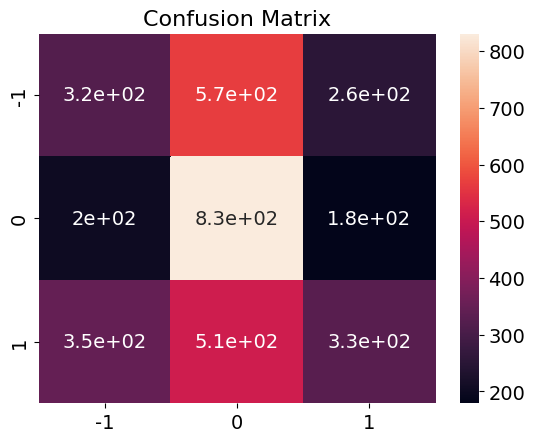

In [268]:
# Set the font sizes
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams.update({'font.size': 14})

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm2, annot=True, ax=ax)

# Set the axis labels
ax.xaxis.set_ticklabels(['-1', '0', '1'])
ax.yaxis.set_ticklabels(['-1', '0', '1'])
plt.show()

In [269]:
# Calculate the classification report
cr2 = classification_report(y[split:], y_predict)
print(cr2)

              precision    recall  f1-score   support

          -1       0.37      0.28      0.32      1142
           0       0.44      0.69      0.53      1213
           1       0.43      0.28      0.34      1189

    accuracy                           0.42      3544
   macro avg       0.41      0.41      0.40      3544
weighted avg       0.41      0.42      0.40      3544



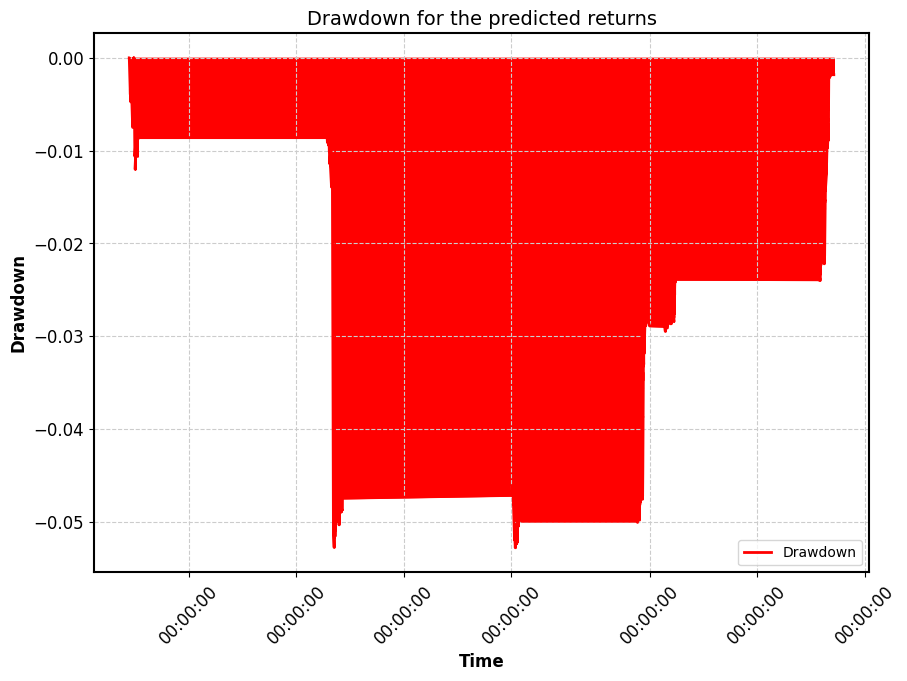

The maximum drawdown is -5.28%


In [270]:
"""
The drawdown metrics and plotting is performed here
"""
# Calculate the cumulative returns
cum_rets = (esUp['Ret1'][split:] + 1).cumprod()

# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1
drawdown.index = cum_rets.index

# Calculate the maximum drawdown
max_dd = drawdown.min()*100

# Plot the drawdown
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(drawdown, color='r')
ax.fill_between(drawdown.index, drawdown.values, color='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))

# Set the font sizes
_ = plt.xticks(rotation=45)
plt.title('Drawdown for the predicted returns', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Drawdown', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(labels=["Drawdown"], prop={'size': 10}, loc="lower right")

# Display the plot
plt.show()
print("The maximum drawdown is %.2f" % max_dd+"%")

In [272]:
# Calculate the annualised Sharpe ratio
sharpe1 = np.sqrt(252*6.25*60) * esUp['Ret1'][split:].mean() / esUp['Ret1'][split:].std()

print("The annualised Sharpe ratio is %.2f" % sharpe1)

The annualised Sharpe ratio is 0.57


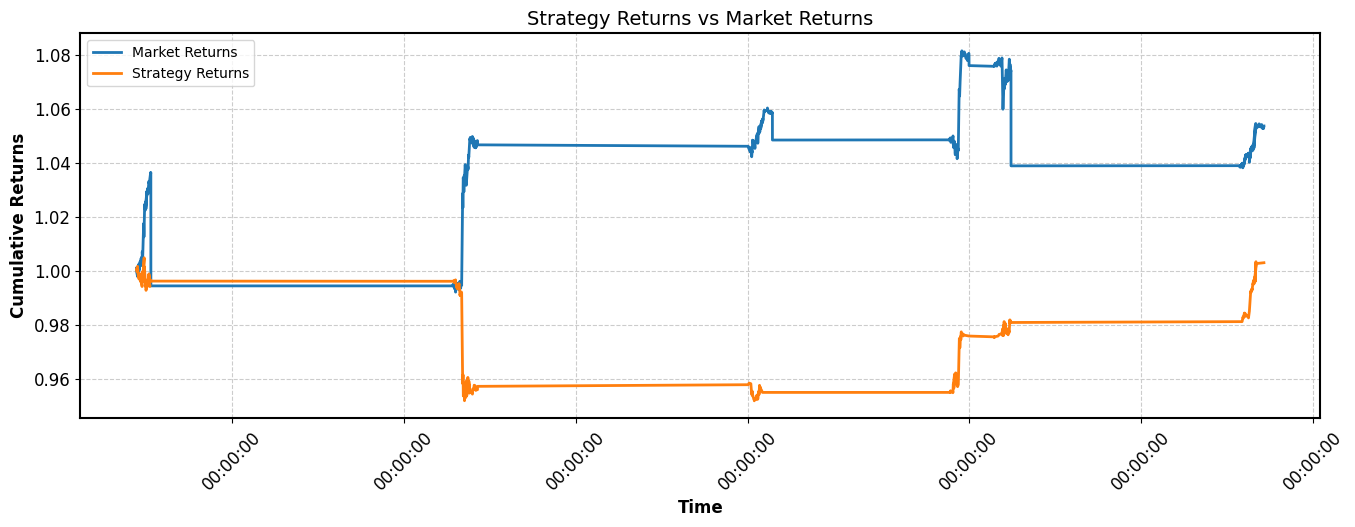

The strategy return is 0.31%


In [274]:
# Plotting the returns
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot((esUp['Fut_Ret'][split:]+1).cumprod())
ax.plot((esUp['Ret1'][split:]+1).cumprod())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M:%S"))
_ = plt.xticks(rotation=45)

# Setting the labels and font sizes
plt.title('Strategy Returns vs Market Returns', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(labels=["Market Returns", "Strategy Returns"],
          prop={'size': 10}, loc="upper left")
plt.show()


return_strategy = ((esUp['Ret1'][split:]+1).cumprod().tail(1)[0]-1)*100
print("The strategy return is %.2f" % return_strategy + "%")

## Current Conclusion: Not Good.
Not outperforming pasive market returns.